![*INTERTECHNICA - SOLON EDUCATIONAL PROGRAMS - TECHNOLOGY LINE*](https://solon.intertechnica.com/assets/IntertechnicaSolonEducationalPrograms-TechnologyLine.png)

# Python for Data Exploration - Categorical Variables

*This notebook will focus on exploring categorical variables using Pyhon*.

Initializing environment for machine learning use:

In [1]:
!python -m pip install numpy
!python -m pip install matplotlib

## 1. Data Loading & Minimal Processing

We will use the **Cleveland Heart Disease Data Set** from University of California Irvine. This dataset is focused on heart disease prediction based on several personal health indicators. 

We will load the raw data in textual format so we can process it even if there are formatting errors:

In [2]:
import numpy as np

In [3]:
# import packages for remote data load
import requests
import io

# read data remotely
data_url = "https://raw.githubusercontent.com/INTERTECHNICA-BUSINESS-SOLUTIONS-SRL/Applying-Python-in-Machine-Learning/master/notebooks/data/data_exploration_processed_cleveland_data.csv"
response = requests.get(data_url)

raw_data = np.loadtxt(
    io.StringIO(response.text), 
    skiprows = 0, 
    delimiter = ",", 
    dtype = {
            "names" : (
                "age", #age in years 
                "sex", #sex (1 = male; 0 = female) 
                "cp", #chest pain type:  1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic   
                "trestbps", #resting blood pressure (in mm Hg on admission to the hospital) 
                "chol", #serum cholestoral in mg/dl 
                "fbs", #fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
                "restecg", #resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality,  
                           #                        2: showing probable or definite left ventricular hypertrophy)
                "thalach", #maximum heart rate achieved 
                "exang", #exercise induced angina (1 = yes; 0 = no) 
                "oldpeak", #ST depression induced by exercise relative to rest 
                "slope", #the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
                "ca", #number of major vessels (0-3) colored by flourosopy 
                "thal", #3 = normal; 6 = fixed defect; 7 = reversable defect, ? = unknown 
                "diagnosis", #diagnosis of heart disease (angiographic disease status)  
                         # 0: no heart disease
                         # 1-4: heart disease present
                         #target variable   
            ),
            "formats": ["U20"] * 14 }
)

We will extract only the categorical attributes, ignoring numerical ones:

In [4]:
categorical_attribute_names = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
target_variable_name = "diagnosis" 

raw_data_categorical = raw_data[categorical_attribute_names]
raw_data_target = raw_data[target_variable_name]

We will convert categorical data to integer codes, setting unknown data (literal '?') to -1 code.

In [5]:
#create a categorical data where everything will be stored as integer codes
categorical_data = np.zeros(
    shape = raw_data_categorical.shape, 
    dtype = {
                "names"   : raw_data_categorical.dtype.names,
                "formats" : ["i4"] * len(raw_data_categorical.dtype.names)
            }    
)

#process data so it will be represented as integers
for name in categorical_attribute_names :
    #force unknown values to -1
    raw_data_categorical[raw_data_categorical[name] == "?"] = "-1.0"
    
    #convert attribute data to int codes
    categorical_data[name] = raw_data_categorical[name].astype(float).astype(int)


We will convert target data to integer codes, creating a dual class target variable.

In [6]:
#convert target data to int codes    
target_data = raw_data_target.astype(int)

#force target data to 0 - no heart disease, 1 - heart disease present
target_data[target_data > 0] = 1

## 2. Loading matplotlib for Data Visualization

The **matplotlib** library is the standard library used for data visualization. It offers a large area of graphs and it is also extended by other libraries such as **seaborn** or **plotly**.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Exploring the target variable

The target variable is contained in the **target_data** variable which is a categorical variable. Let's explore some basic target variable characteristics. 

In [8]:
print ("Target data shape is {}".format(target_data.shape))

Target data shape is (303,)


In [9]:
# set labels
target_data_labels = {0: b"No Disease", 1: b"Disease Present"}

# get unique values and map them to keys
target_data_unique, target_data_counts = np.unique(target_data, return_counts=True)
target_data_unique_labels = np.array([target_data_labels[unique] for unique in target_data_unique])

# print unique data frequencies
target_data_frequencies = np.asarray((target_data_unique_labels, target_data_counts)).T
print ("Target data value frequencies are: \n {}".format(target_data_frequencies))

Target data value frequencies are: 
 [[b'No Disease' b'164']
 [b'Disease Present' b'139']]


The frequencies for target variable are pretty closed; this makes the dataset pretty balanced in regards with target variable.  
We can see this on the plot as well (horizontal bar plot is preffered). 

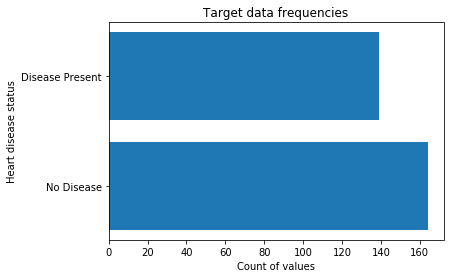

In [10]:
# plot a horizontal bar plot

plt.barh(target_data_unique_labels, target_data_counts)
plt.title("Target data frequencies")
plt.xlabel("Count of values")
plt.ylabel("Heart disease status")
plt.show()

## 4. Exploring categorical variables

Let's explore the categorical variables structure and their relation with the target variable.  
We will do this for the **sex** categorical variable (this excercise can be repeated for other variables as well):

In [11]:
# sex attribute variables
sex_data_labels = {0: b"Female", 1: b"Male"}
sex_data = categorical_data["sex"]

# get unique values and map them to keys
sex_data_unique, sex_data_counts = np.unique(sex_data, return_counts = True)
sex_data_unique_labels = np.array([sex_data_labels[unique] for unique in sex_data_unique])

# print unique data frequencies
sex_data_frequencies = np.asarray((sex_data_unique_labels, sex_data_counts)).T
print ("Categorical data 'sex' data value frequencies are: \n {}".format(sex_data_frequencies))


Categorical data 'sex' data value frequencies are: 
 [[b'Female' b'97']
 [b'Male' b'206']]


One of the standard ways to represent categorical variables frequencies is via **bar graphs**. The bar chart graph has usually vertical bars, however some data scientists preffer horizontal bars.  
Let's build a horizontal bar grah for attribute sex: 

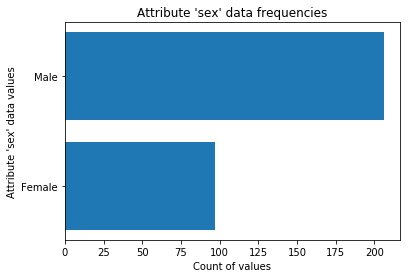

In [12]:
#  plot a horizontal bar plot
plt.barh(sex_data_unique_labels, sex_data_counts)
plt.title("Attribute 'sex' data frequencies")
plt.xlabel("Count of values")
plt.ylabel("Attribute 'sex' data values")
plt.show()

We can see that *the dataset in imbalanced as it contains more male records* (this can be observed from frequency table as well).

A very important indicator is the relation between the categorical variable and the target variable. One way to capture this is via a **contingeny table**.  
Contingency tables contain the count of records per each catogorical variable value and target variable value.

In [13]:
# concatenate categorical data and target data
attribute_sex_vstack_data = np.vstack((sex_data, target_data))

# initialize contingency table
attribute_sex_contingency_table = np.zeros( 
    shape =(sex_data_unique.shape[0] * target_data_unique.shape[0]),
    dtype = {
                "names" : (
                    "target",  
                    "attribute_sex", 
                    "count"
                ),
                "formats" : ["S20", "S20", "i4"]
    }
)

# populate contingency table
index = 0 
for index_target in target_data_unique :
    for index_sex in sex_data_unique :
        # for each entry store its current target and categorical values
        attribute_sex_contingency_table[index]["target"] = target_data_labels[index_target]
        attribute_sex_contingency_table[index]["attribute_sex"] = sex_data_labels[index_sex]
        
        # retain count of matching values as well
        attribute_sex_contingency_table[index]["count"] =  attribute_sex_vstack_data[1][
            (attribute_sex_vstack_data[0] == index_sex) & 
            (attribute_sex_vstack_data[1] == index_target)
            ].shape[0]
        
        index = index + 1

print(attribute_sex_contingency_table)

[(b'No Disease', b'Female',  72) (b'No Disease', b'Male',  92)
 (b'Disease Present', b'Female',  25) (b'Disease Present', b'Male', 114)]


A good way to visually capture relations between categorical variables are by using **stacked bar charts**. These charts capture well proportions of records for each categorical variable value. 

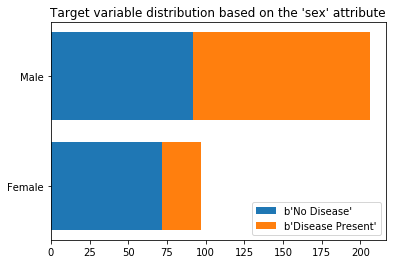

In [14]:
plot_left_positions = np.zeros(shape = (len(list(sex_data_labels.values()))))

for index_target in target_data_unique :
    plot_target_data = attribute_sex_contingency_table[
            (attribute_sex_contingency_table["target"] == target_data_labels[index_target])]
    
    plot_target_labels = list(sex_data_unique_labels)
    plot_target_values = plot_target_data["count"]
    
    plt.barh(
        plot_target_labels, 
        plot_target_values, 
        left = plot_left_positions, 
        label=target_data_labels[index_target]
    ) 
    
    plot_left_positions = plot_left_positions + plot_target_values
    
plt.legend()
plt.title("Target variable distribution based on the 'sex' attribute")
plt.show()

From the chart above we can infer that the *heart disease is prevalent for records where sex is male*. In case of *female records heart disease seem to be rarer*.

Let's plot the frequencies for the other variables. First of all let's prepare the metadata information: 

In [15]:
# metadata label information 
data_labels = {
    "cp"  : {1: "typical angina", 2: "atypical angina", 3: "non-anginal pain", 4: "asymptomatic" },
    "fbs" : {1 : "true", 0 : "false"},
    "restecg" : {0: "normal", 1: "ST-T wave abnormality", 
                 2: "probable or definite left ventricular hypertrophy"},
    "exang" : {1 : "true", 0 : "false"},
    "slope" : {1: "upsloping", 2: "flat", 3: "downsloping"},
    "thal" :  {3: "normal", 6: "fixed defect", 7: "reversable defect", -1: "unknown"} 
}

# let's get the attribute info
attributes_plotted = np.array(list(data_labels.keys()))
count_attributes_ploted = len(attributes_plotted) 

We will plot the data frequencies attribute by attribute:

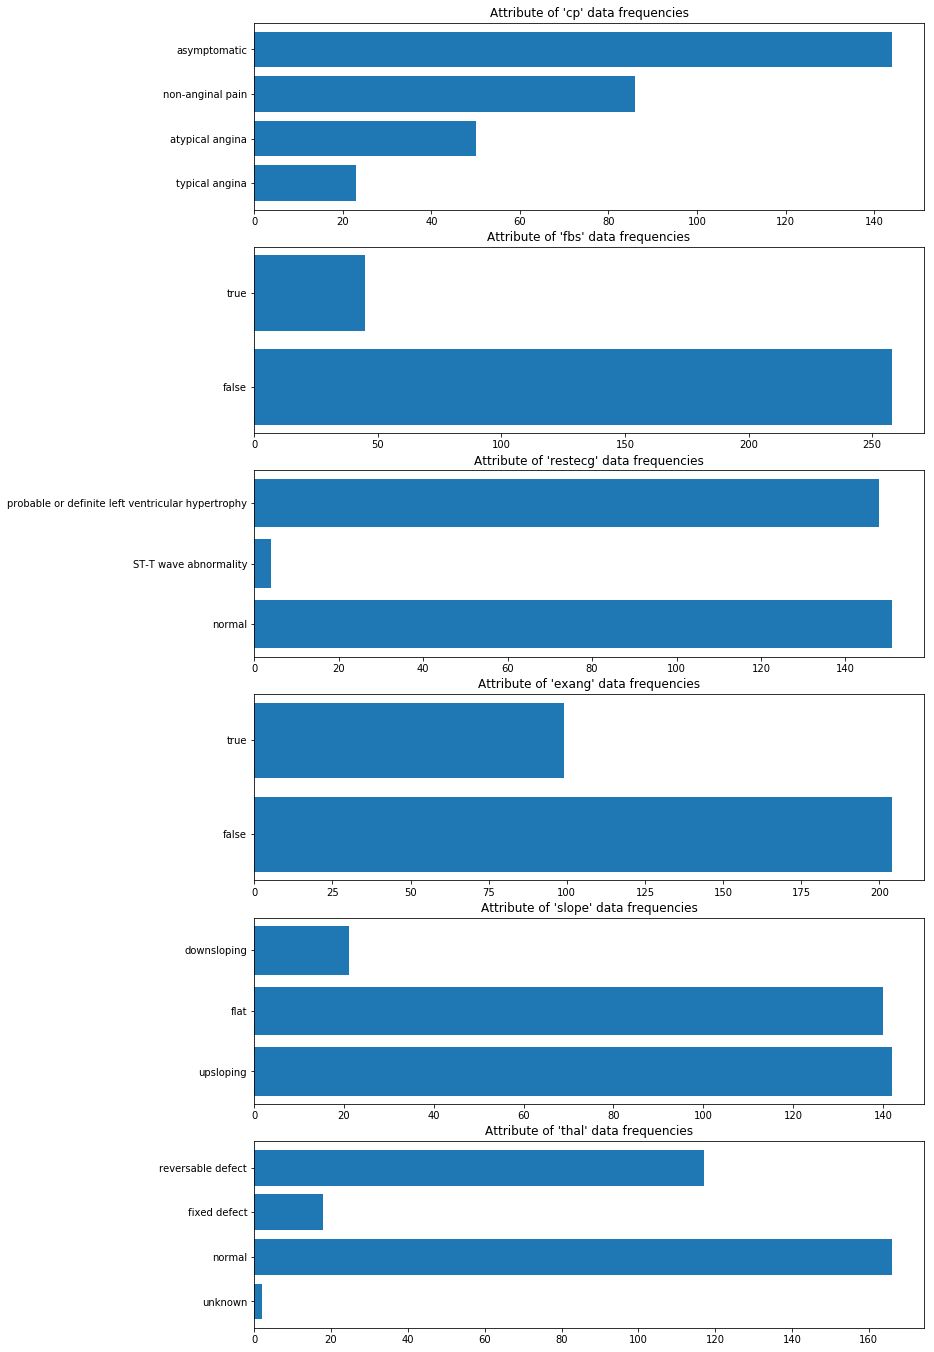

In [16]:
# prepare the subplot infrastructure 
fig, axes = plt.subplots (
    count_attributes_ploted, 
    figsize=(2*count_attributes_ploted, 4*count_attributes_ploted)
)

index = 0
# plot data
for var_name in attributes_plotted :
    # get data and labels
    var_data = categorical_data[var_name]
    var_data_labels = data_labels[var_name]
    
    # calculate frequencies
    var_data_unique, var_data_counts = np.unique(var_data, return_counts = True)
    var_data_unique_labels = np.array([var_data_labels[unique] for unique in var_data_unique])
    var_data_frequencies = np.asarray((var_data_unique_labels, var_data_counts)).T
    
    # display the plot
    axes[index].barh(var_data_unique_labels, var_data_counts)
    axes[index].title.set_text("Attribute of '{}' data frequencies".format(var_name))
    
    index = index + 1    
    
plt.show()

We can observe that some categorical values have an imbalanced representation in the dataset (e.g. fbs variable - true value).  
This has to be considered in the data preparation phase.

Let's plot as well the frequency of data in relation with the target variable.

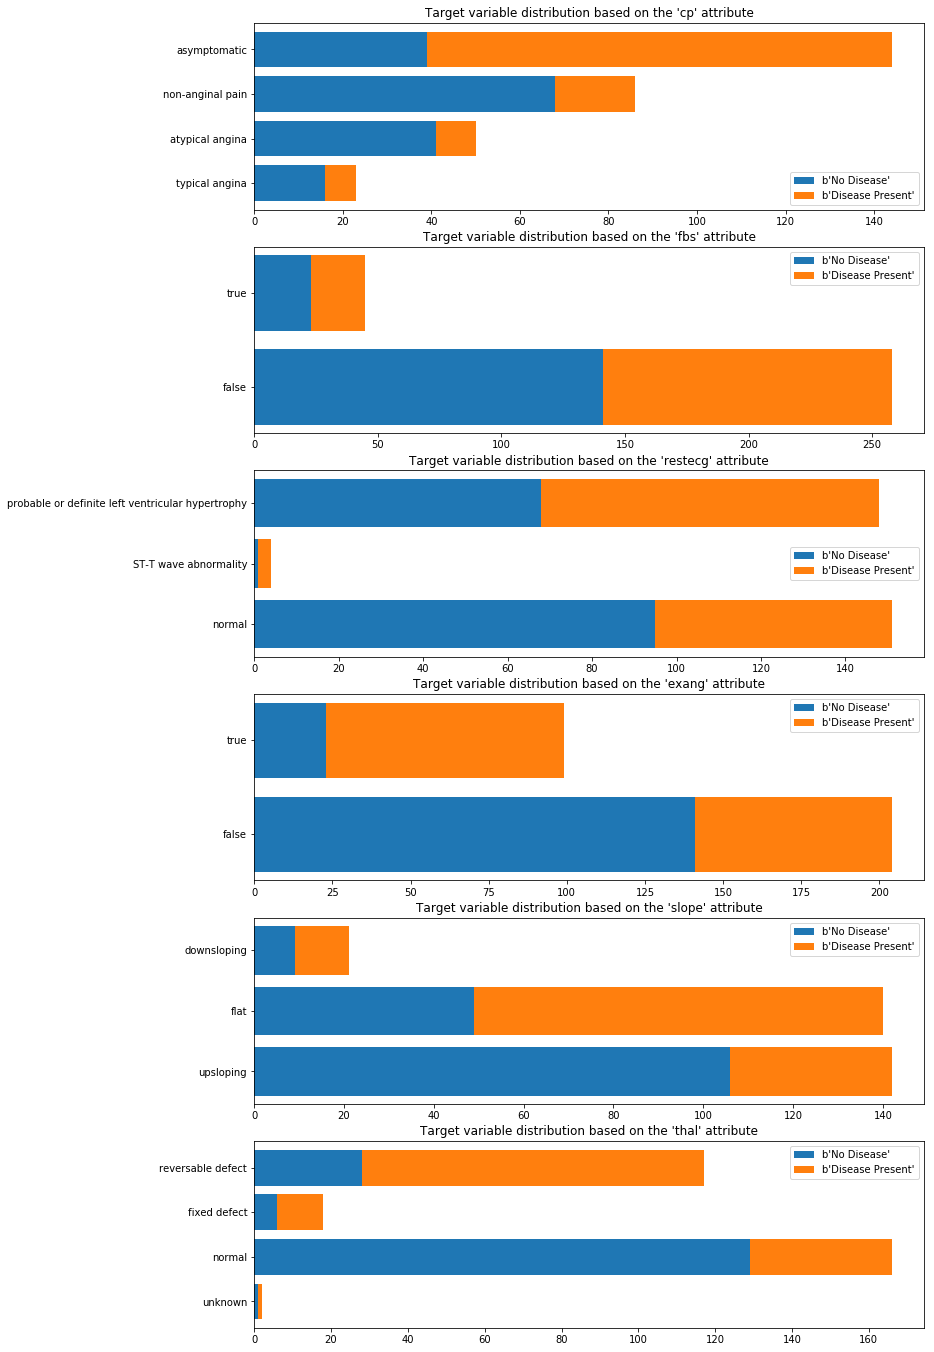

In [17]:
# prepare the subplot infrastructure 
fig, axes = plt.subplots (
    count_attributes_ploted, 
    figsize=(2*count_attributes_ploted, 4*count_attributes_ploted)
)

index = 0
# plot data
for var_name in attributes_plotted :
    # get data and labels
    var_data = categorical_data[var_name]
    var_data_labels = data_labels[var_name]
    
    # concatenate categorical data and target data
    var_vstack_data = np.vstack((var_data, target_data))
    var_data_unique, var_data_counts = np.unique(var_data, return_counts = True)
    var_data_unique_labels = np.array([var_data_labels[unique] for unique in var_data_unique])
     
    # initialize contingency table
    var_contingency_table = np.zeros( 
        shape =(var_data_unique.shape[0] * target_data_unique.shape[0]),
        dtype = {
                    "names" : (
                        "target",  
                        "data", 
                        "count"
                    ),
                    "formats" : ["S20", "S20", "i4"]
        }
    )
    
    # populate contingency table
    index_contingency = 0 
    for index_target in target_data_unique :
        for index_var in var_data_unique :
            # for each entry store its current target and categorical values
            var_contingency_table[index_contingency]["target"] = target_data_labels[index_target]
            var_contingency_table[index_contingency]["data"] = var_data_labels[index_var]

            # retain count of matching values as well
            var_contingency_table[index_contingency]["count"] =  var_vstack_data[1][
                (var_vstack_data[0] == index_var) & 
                (var_vstack_data[1] == index_target)
                ].shape[0]

            index_contingency = index_contingency + 1
     
    plot_left_positions = np.zeros(shape = (len(list(var_data_labels.values()))))

    for index_target in target_data_unique :
        plot_target_data = var_contingency_table[
                (var_contingency_table["target"] == target_data_labels[index_target])]

        plot_target_labels = list(var_data_unique_labels)
        plot_target_values = plot_target_data["count"]
        
        axes[index].barh(
            plot_target_labels, 
            plot_target_values, 
            left = plot_left_positions, 
            label = target_data_labels[index_target]
        ) 
        axes[index].title.set_text("Target variable distribution based on the '{}' attribute".format(var_name))
        axes[index].legend()

        plot_left_positions = plot_left_positions + plot_target_values
        
    index = index + 1
    

We can observe that there are some high impact categorical values distributions:

* cp - asymptomatic: is associated more with a 'Disease Present' condition;
* exang - true: is associated more with a 'Disease Present' condition;
* slope - upsloping: is associated more with a 'No Disease' condition;
* thal - normal: is associated more with a 'No Disease' condition.

These associations reveal some important predictors for the target variable.